In [1]:
from sklearn import datasets
digits = datasets.load_digits()
n = digits.target.shape[0]
import numpy as np
import random
random.seed(123)
indices = np.array(list(set([random.randint(0, n) for i in range(100)])))
labels = digits.target[indices]
data = digits.data[indices]

In [2]:
data

array([[  0.,   0.,   7., ...,   9.,   0.,   0.],
       [  0.,   0.,   1., ...,   3.,   0.,   0.],
       [  0.,   2.,   9., ...,  11.,   0.,   0.],
       ..., 
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       [  0.,   0.,   3., ...,   9.,   0.,   0.],
       [  0.,   0.,   0., ...,   6.,   0.,   0.]])

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=123,
                   dissimilarity="euclidean", n_jobs=1)
mds


MDS(dissimilarity='euclidean', eps=1e-09, max_iter=3000, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=123, verbose=0)

In [4]:
data_mds = mds.fit(data).embedding_
data_mds

array([[-19.51303971, -20.41823645],
       [ -4.07593511,   9.35897683],
       [-31.00523503,  -7.67846859],
       [-35.75764508,  10.44774877],
       [  5.59026225, -17.29521269],
       [ 11.97655306,  12.22829745],
       [ 15.25794671,  31.05617523],
       [-25.79056895,  29.88613377],
       [-10.04741421, -26.52225104],
       [-35.66520853,   1.16539859],
       [-39.47468187,  22.63228924],
       [ -6.93509794,  39.78971228],
       [-20.95223628, -27.68618938],
       [-10.38757908,  25.18008394],
       [-17.77529191,   1.31227389],
       [ 29.99031246,  16.54974674],
       [-22.53093288,  25.53871594],
       [ 36.07828582,  -4.8243011 ],
       [-18.80800715,  11.64556649],
       [  7.60907703,  43.50117329],
       [ 14.19626422, -28.97827972],
       [-16.47691626, -31.64881718],
       [-30.72245981, -20.29590957],
       [-16.71741647,  27.39585998],
       [-36.43541554, -11.61842247],
       [ 14.8379417 ,  38.77483602],
       [ 27.43029934,  21.62250583],
 

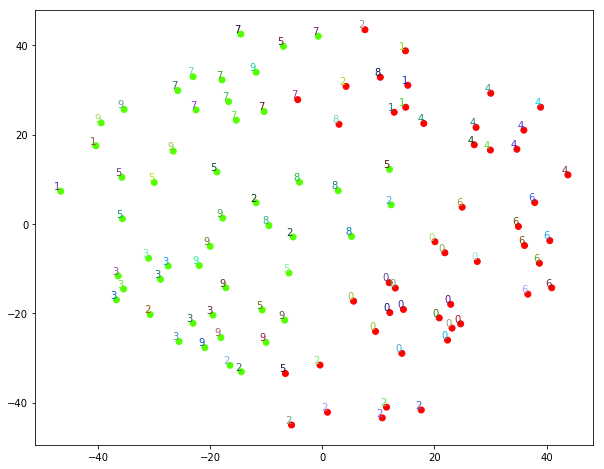

In [8]:
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
ward = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster_ward = ward.fit_predict(data_mds)
plt.figure(figsize=(10, 8))
plt.scatter(data_mds[:,0], data_mds[:,1], c=cluster_ward, cmap='prism')  # plot points with cluster dependent colors
color = ["#%06x" % random.randint(0, 0xAAAAAA) for i in range(0, data.shape[0])]
for label, x, y, c in zip(labels, data_mds[:,0],data_mds[:,1], color):
    plt.annotate(label, xy = (x, y), xytext = (-0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom', color=c)

plt.show()